
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

**Grupo 8**

**Integrantes:**


*   Abdala, Agustin
*   Acosta, Martín
*   Baulina, David
*   Giovine, Carina




---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import scipy

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [ ]:
df[['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                     \
                             count          mean            std   min   
profile_gender                                                          
Hombre                      4944.0  98836.063558  102159.664237   1.0   
Mujer                        908.0  73501.414465   56256.880181   2.0   
Otros                         31.0  95441.354839   88635.674358  40.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          53285.0  80000.0  110000.0  2080000.0  
Mujer           43818.0  65000.0   92000.0   800000.0  
Otros           39500.0  74000.0  117500.0   380000.0

In [ ]:
df[df.salary_monthly_NETO > 1000]\
  [['profile_gender', 'salary_monthly_NETO']].groupby('profile_gender').describe()

salary_monthly_NETO                                         \
                             count           mean            std      min   
profile_gender                                                              
Hombre                      4815.0  101481.624343  102215.304684   1100.0   
Mujer                        863.0   77328.913778   55082.760570   2000.0   
Otros                         28.0  105660.714286   87235.710235  34000.0   

                                                       
                    25%      50%       75%        max  
profile_gender                                         
Hombre          55000.0  80000.0  110000.0  2080000.0  
Mujer           47850.0  67200.0   93000.0   800000.0  
Otros           43750.0  78900.0  122750.0   380000.0

In [ ]:
alpha = 0.05

In [ ]:
is_man = df.profile_gender == 'Hombre'

groupA = df[(df.salary_monthly_NETO > 1000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 1000) & ~is_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB). 
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0=...$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)

In [ ]:
#tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, ratio=ratio)

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave: 
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle. 
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


# Respuestas

## Ejercicio 1: Estimación
 

Para el calculo del intervalo de confianza se tomaran 25 muestras (15 genero masculino y 10 otros generos).Dado que n<30, se utiliza la distribucion t de student.

In [ ]:
alpha = 0.05
n_A = 15
n_B = 10
muestra_A = groupA.sample(n_A, replace=False)
muestra_B = groupB.sample(n_B, replace=False)

Graficando ambas muestras

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


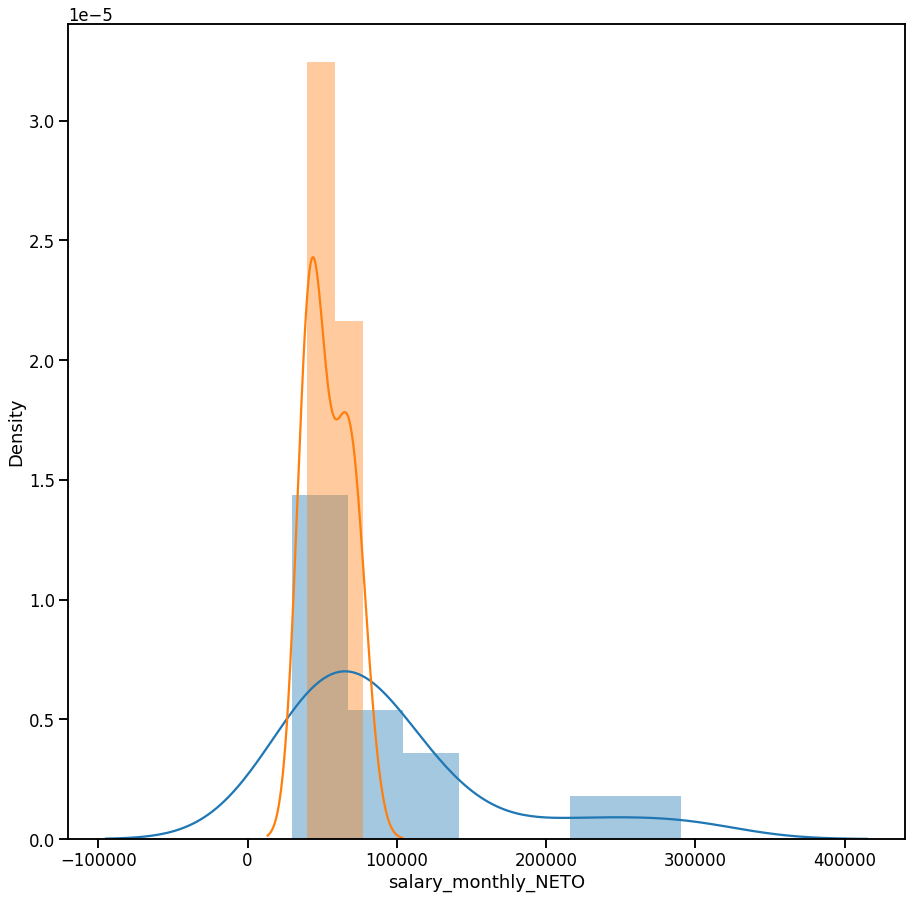

In [ ]:
f,ax=plt.subplots(figsize=(15, 15))
seaborn.distplot(muestra_A)
seaborn.distplot(muestra_B)


#plot = seaborn.histplot(data = concatenated , x = 'salary_monthly_NETO', y = 'profile_years_experience', hue='profile_gender', height=10)
#plot.ax_marg_x.set_xlim(0, 45)
#plt.show()

Se calcula la varianza de cada muestra. La varianza de la diferencia es la suma de cada varianza muestral.

In [ ]:
varianza_muestra_A = muestra_A.var()
varianza_muestra_B = muestra_B.var()


Se calculan los grados de libertad para ingresar a tabla y obtener t para α=0.05

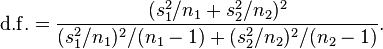

In [ ]:
coef_A=(varianza_muestra_A/n_A)
coef_B=(varianza_muestra_B/n_B)

In [ ]:
d_f=((coef_A+coef_B)**2)/ (  (((coef_A)**2)/(n_A-1)) +   (((coef_B)**2)/(n_B-1))        )
d_f

15.574135351574625

De tabla de disribución t-student con 18 grados de libertad y α=0.05, se obtiene tα=-2.1

In [ ]:
t_alpha= 2.1

Se calcula la media de cada muestra. la media de las diferencias es igual a la resta de cada media muestral.




In [ ]:
media_muestra_A = muestra_A.mean()
media_muestra_B = muestra_B.mean()
media_diferencia_medias=media_muestra_A-media_muestra_B

Calculo de limite superior, Limite inferior y rango del intervalo de confianza.

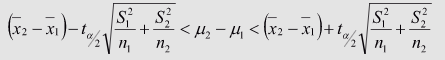

In [ ]:
#calculo de limite inferior
limite_superior= media_diferencia_medias + t_alpha * (numpy.sqrt(coef_A+coef_B))
limite_superior

79751.64028983595

In [ ]:
#calculo de limite inferior
limite_inferior= media_diferencia_medias - t_alpha * (numpy.sqrt(coef_A+coef_B))
limite_inferior

3.693043497376493

In [ ]:
#calculo de rango de intervalo de confianza
rango_ic= limite_superior-limite_inferior
rango_ic

79747.94724633858

**El intervalo de confianza de nivel (1-α) del 95%, con n=25, para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros se encuentra entre:**

---



In [ ]:
print("Limite Inferior: ", limite_inferior)
print("Limite Superior: ", limite_superior)

print("")

Limite Inferior:  3.693043497376493
Limite Superior:  79751.64028983595



A continuacion se realiza un calculo con muestra mas grande para verificar disminución del rango del intervalo de confianza 

Para el calculo del intervalo de confianza se tomaran 30 muestras (20 genero masculino y 10 otros generos).Dado que n<30, se utiliza la distribucion t de student.

In [ ]:
alpha = 0.05
n_A = 20
n_B = 10
muestra_A = groupA.sample(n_A, replace=False)
muestra_B = groupB.sample(n_B, replace=False)

Graficando ambas muestras

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


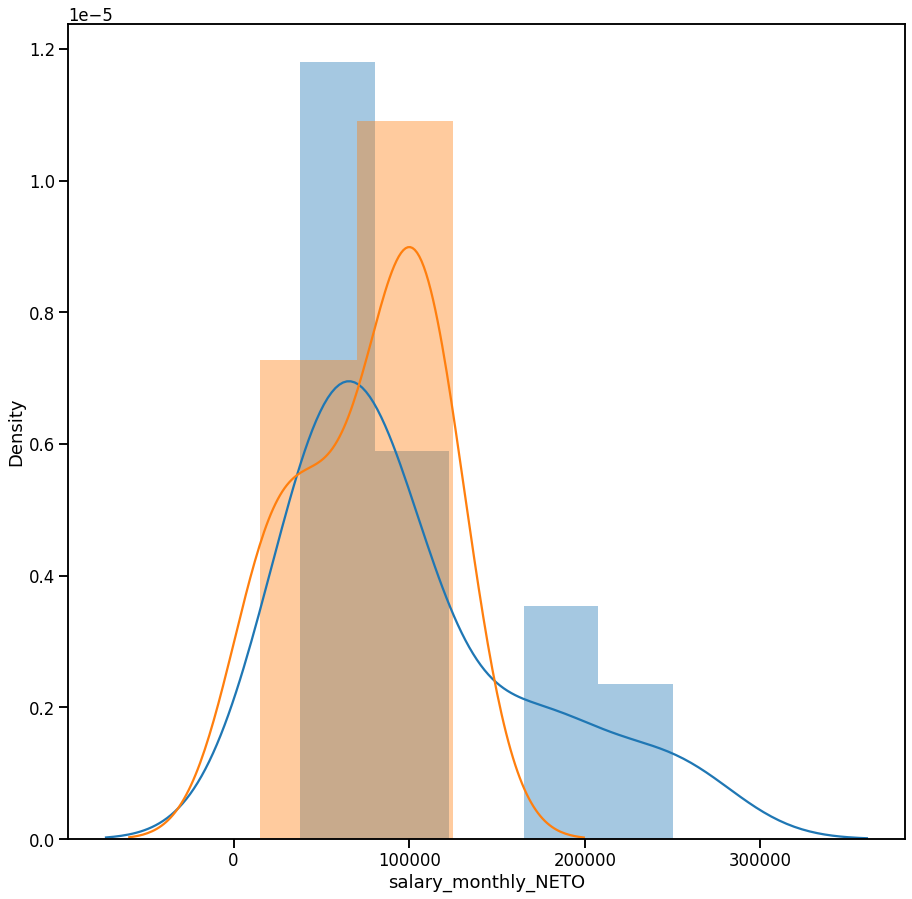

In [ ]:
f,ax=plt.subplots(figsize=(15, 15))
seaborn.distplot(muestra_A)
seaborn.distplot(muestra_B)


#plot = seaborn.histplot(data = concatenated , x = 'salary_monthly_NETO', y = 'profile_years_experience', hue='profile_gender', height=10)
#plot.ax_marg_x.set_xlim(0, 45)
#plt.show()

Se calcula la varianza de cada muestra. La varianza de la diferencia es la suma de cada varianza muestral.

In [ ]:
varianza_muestra_A = muestra_A.var()
varianza_muestra_B = muestra_B.var()


In [ ]:
coef_A=(varianza_muestra_A/n_A)
coef_B=(varianza_muestra_B/n_B)

In [ ]:
d_f=((coef_A+coef_B)**2)/ (  (((coef_A)**2)/(n_A-1)) +   (((coef_B)**2)/(n_B-1))        )
d_f

27.100097133337655

De tabla de disribución t-student con 27 grados de libertad y α=0.05, se obtiene tα=2.052

In [ ]:
t_alpha= 2.052

Se calcula la media de cada muestra. la media de las diferencias es igual a la resta de cada media muestral.




In [ ]:
media_muestra_A = muestra_A.mean()
media_muestra_B = muestra_B.mean()
media_diferencia_medias=media_muestra_A-media_muestra_B

Calculo de limite superior, Limite inferior y rango del intervalo de confianza.


In [ ]:
#calculo de limite superior
limite_superior= media_diferencia_medias + t_alpha * (numpy.sqrt(coef_A+coef_B))
limite_superior

65340.30154695468

In [ ]:
#calculo de limite inferior
limite_inferior= media_diferencia_medias - t_alpha * (numpy.sqrt(coef_A+coef_B))
limite_inferior

-14678.15854695467

In [ ]:
#calculo de rango de intervalo de confianza
rango_ic= limite_superior-limite_inferior
rango_ic

80018.46009390935

**Como se puede ver en el calculo anterior se verifica la disminución del rango del intervalo de confianza cuando aumentamos el n de las muestras.**


## Ejercicio 2: Test de hipótesis



### 2.1 Formalización

A continuación se describen los componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.


1 - Formulación de Hipotesis nula

**Hipótesis Nula**


$H_0: µ1=µ2$  o bien µ1-µ2=0

$H_1: µ1≠µ2$


2 - Establecimiento de nivel de signiuficancia del test

**Estadístico (Pivote)**
  * Identificar el estadístico 

  Para una muestra de n=30 y α=0.05 se definira $t_c$=2.048 (valor de tabla t con gl=$n_1$+$n_2$-2)
  * La distribución bajo $H_0$ es T-Student 



3- Calculo de estadistico de contraste

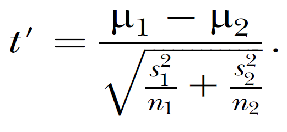

In [ ]:
alpha = 0.05
n_A = 15
n_B = 10
t_c = 2.048
muestra_A = groupA.sample(n_A, replace=False)
muestra_B = groupB.sample(n_B, replace=False)

In [ ]:
media_muestra_A = muestra_A.mean()
media_muestra_B = muestra_B.mean()
media_diferencia_medias=media_muestra_A-media_muestra_B

In [ ]:
varianza_muestra_A = muestra_A.var()
varianza_muestra_B = muestra_B.var()

Cálculo del estadistico de prueba

In [ ]:
t_p= media_diferencia_medias/(numpy.sqrt(coef_A+coef_B))
t_p

0.8872442273530314

4 - Regla de decisión

Como se puede ver $t_p$ < $t_c$

5 - Que dicen los datos

Dado que tp  < tc se debe aceptar la hipotesis nula H0:µ1=µ2  o bien µ1-µ2=0

6 - Conclusión

**La hipotesis nula se acepta**, ya que hay evidencia estadistica, con una significancia del 5%(α=0.05) de que los sueldos medios de programadores hombres sea igual al sueldo medio de programadores de otros generos

El intervalo de confianza 95% incluye el valor de la Hipotesis Nula H0 (µ1-µ2=0), esto implica que hay evidencia suficiente para acepatarla para el nivel de confianza dado. Esta es la relacion del intervalo de confianza con el test de hipótesis

### 2.2 P-valor

1. Calculo p-valor y decisión de rechazar o no la hipótesis nula.
2. Interprete el resultado.



Para el calculo del pvalor se tomaran 25 muestras (15 de hombres y 10 de otro genero). Dado que n<30 y las varianzas son distintas, se utiliza el test de WELCH

In [ ]:
n_A = 15
n_B = 10
muestra_A = groupA.sample(n_A, replace=False)
muestra_B = groupB.sample(n_B, replace=False)

In [ ]:
# test for the null hypothesis that 2 independent samples have no identical variances, performs Welsh t-test
scipy.stats.ttest_ind(muestra_A, muestra_B, equal_var = False)

Ttest_indResult(statistic=-0.6507759464002679, pvalue=0.5220205423592807)

Se puede ver que el P-valor>α=0.05 se debe aceptar la hipotesis nula. Esto quiere decir que solo el 5% de los valores o menos caen en region critica.

### Ejercicio 3: Comunicación y visualización

#### Tweet 1

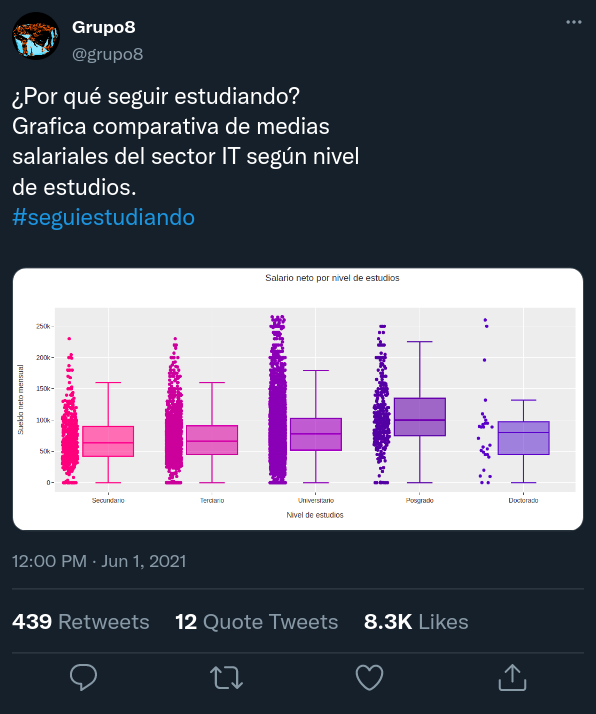

Este grafico fue desarrollado en ejercicio 2 de Parte 1

Tweet 2

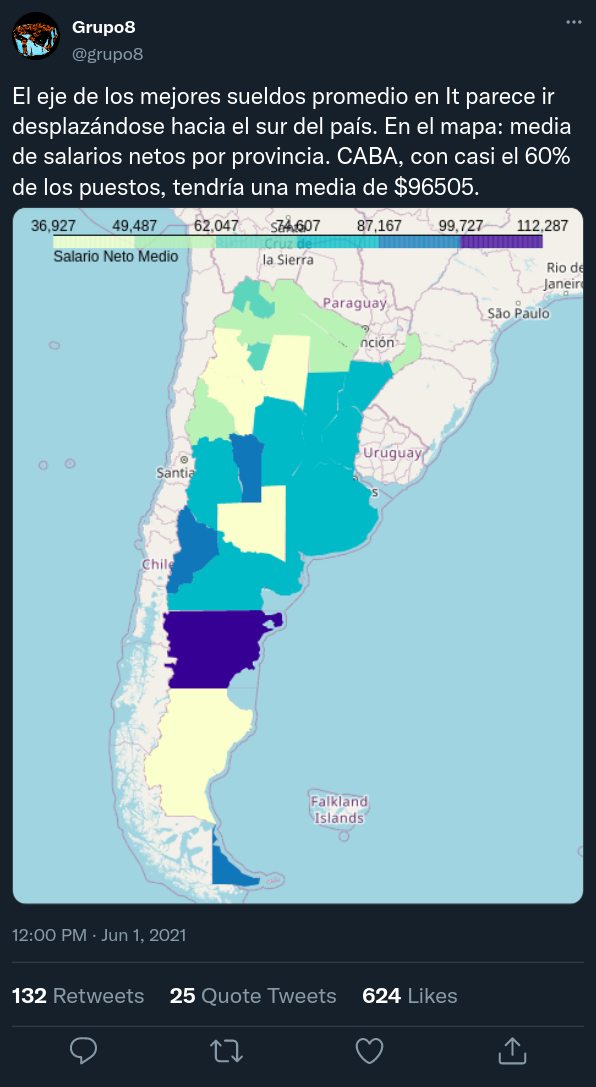

A continuación el codigo utilizado para la creación del Tweet 2

In [ ]:
#Importamos e instalamos los modulos necesarios

!pip install geopandas
!pip install folium
!wget -nc https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.12/download/provincias.geojson -o provincias.json
!wget -nc https://raw.githubusercontent.com/agustinabdala/diplodatos/main/ProvinciasArgentina.geojson

import folium
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import geopandas as gpd
from google.colab import files

seaborn.set_context('talk')

     |████████████████████████████████| 1.0 MB 4.1 MB/s 
     |████████████████████████████████| 6.3 MB 44.2 MB/s 
     |████████████████████████████████| 16.7 MB 399 kB/s 
--2022-04-22 01:37:40--  https://raw.githubusercontent.com/agustinabdala/diplodatos/main/ProvinciasArgentina.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45216 (44K) [text/plain]
Saving to: ‘ProvinciasArgentina.geojson’

ProvinciasArgentina 100%[===================>]  44.16K  --.-KB/s    in 0.01s   

2022-04-22 01:37:40 (3.39 MB/s) - ‘ProvinciasArgentina.geojson’ saved [45216/45216]



## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
# complete here if you want to include more columns
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO', 'profile_years_experience','work_province', 'profile_studies_level' ]

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
#df_lang[:5]

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
#language_count[:10]

Se seleccionan para el analisis los lenguajes: 'javascript', 'sql', 'html', 'python', 'java'

### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python", 'javascript', 'sql', 'html', 'java']
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
#filtered_df_lang[:5]

In [ ]:
#Descartando NaN en salarios
df_draft = filtered_df_lang[filtered_df_lang['salary_monthly_NETO'].notnull()]
#Filtrando años de experiencia <50, hay algunos irracionales
df_draft= df_draft.reindex()

In [ ]:
k = 90
percentile_90 = df_draft['salary_monthly_NETO'].quantile(k / 100)
n_below = len(df_draft[df_draft['salary_monthly_NETO'] < percentile_90])
n_above = len(df_draft[df_draft['salary_monthly_NETO'] > percentile_90])
#print('Percentil {} de la columna {}: {}'.format(k, 'salary_monthly_NETO', percentile_90))
#print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
#print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

In [ ]:
df_draft['salary_monthly_NETO'].quantile([.95, .98, .99, .995, .998])

In [ ]:
# Funcion para limitar los boxes segun rango intercuartilico
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

In [ ]:
#Agrupar por años de exp
experiencia = df_draft.groupby(by=['programming_language']).mean()
#experiencia = experiencia['salary_monthly_NETO'].round(decimals = 2).to_frame()

In [ ]:
# HTML creado en    1993
# JS creado en      1995
# Python creado en  1991
# JAVA creado en    1995
# SQL cresado en    1989

#Recortando años de experiencia a 31
df_draft = df_draft[(df_draft['profile_years_experience']<31)]


In [ ]:
# Graficando:
fig = plt.figure(figsize=(10, 5))
seaborn.boxplot(data= clean_outliers_q3(df_draft.reset_index(), 'salary_monthly_NETO'), x='work_province', y='salary_monthly_NETO',  hue='programming_language' ).tick_params(labelsize=13 , rotation=75)
seaborn.rugplot(data=clean_outliers_q3(df_draft.reset_index(), 'salary_monthly_NETO'),y='salary_monthly_NETO')
seaborn.despine()


# **MAPA**

In [ ]:
#prov_geo = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/linea_de_limite_070111/json'
# prov_geo = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcaci%C3%B3n/L%C3%ADmites/provincia/json' 
#prov_geo = 'https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.12/download/provincias.geojson'

In [ ]:
# We read the file and print it.
#geoJSON_df = gpd.read_file(prov_geo)
geoJSON_df = gpd.read_file('provincias.geojson')
geoJSON_df.sort_values('iso_nombre')


In [ ]:
df_provincias = clean_outliers_q3(df_draft.reset_index(), 'salary_monthly_NETO')
df_provincias.replace({'GBA':'Provincia de Buenos Aires'}, inplace=True)
df_provincias = df_provincias.groupby(by='work_province').mean('salary_monthly_NETO').reset_index()

In [ ]:
df_provincias.sort_values(by='work_province')

In [ ]:
#provincias que difieren
missing_states = numpy.setdiff1d(geoJSON_df['iso_nombre'],df_provincias['work_province'])
missing_states

In [ ]:
geoJSON_df.iloc[22,6] = 'Provincia de Buenos Aires'

In [ ]:
missing_states = numpy.setdiff1d(geoJSON_df['iso_nombre'],df_provincias['work_province'])
missing_states

In [ ]:
geoJSON_df = geoJSON_df.rename(columns = {"iso_nombre":"work_province"})

In [ ]:
final_df = geoJSON_df.merge(df, on = "work_province")
final_df.head()

In [ ]:
# Initialize folium map.
sample_map = folium.Map(location=[-26.8083,-65.2176], zoom_start=4)
sample_map# Set up Choropleth map
folium.Choropleth(
geo_data=final_df,
data=final_df,
columns=['work_province','salary_monthly_NETO'],
key_on="feature.properties.work_province",
fill_color='YlGnBu',
fill_opacity=1,
line_opacity=0.2,
legend_name="wills",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Wills",
show=False,
overlay=True,
nan_fill_color = "White"
).add_to(sample_map)

sample_map

In [ ]:
#Por si hay que montar el file desde DRIVE
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# MAPA CON CONTORNOS DE PROVINCIAS

#FUENTE:
#GEOPANDAS DF de PABLO GOMEZ 
#https://www.kaggle.com/code/pablomgomez21/fuel-market-analysis-argentina-onprogress

#geoJSON_df2 = gpd.read_file('/content/drive/MyDrive/GEOJSON/ProvinciasArgentina.geojson')  #desde DRIVE
geoJSON_df2 = gpd.read_file('/content/ProvinciasArgentina.geojson')  #desde ARCHIVOS COLAB
geoJSON_df2

In [ ]:
#provincias que difieren
missing_states = numpy.setdiff1d(geoJSON_df2['nombre'],df_provincias['work_province'])
missing_states

In [ ]:
#ERROR
geoJSON_df2['nombre'] = geoJSON_df2['nombre'].replace({'Buenos Aires':'Provincia de Buenos Aires', 'Capital Federal':'Ciudad Autónoma de Buenos Aires'})

In [ ]:
#provincias que difieren
missing_states = numpy.setdiff1d(geoJSON_df2['nombre'],df_provincias['work_province'])
missing_states

In [ ]:
geoJSON_df2 = geoJSON_df2.rename(columns = {"nombre":"work_province"})

In [ ]:
final_df = geoJSON_df2.merge(df_provincias, on = "work_province")
final_df.head()

In [ ]:
# Initialize folium map.
provincias_map = folium.Map(width=700, height=700, location=[-26.8083,-65.2176], zoom_start=4)

# Set up Choropleth map
folium.Choropleth(
geo_data=final_df,
data=final_df,
columns=['work_province','salary_monthly_NETO'],
key_on="feature.properties.work_province",
fill_color='YlGnBu',
fill_opacity=1,
line_opacity=0.2,
legend_name="Salario Neto Medio",
smooth_factor=0,
Highlight= True,
line_color = "#0000",
name = "Salario Neto Medio",
show=False,
overlay=True,
nan_fill_color = "White"
).add_to(provincias_map)

provincias_map

In [ ]:
provincias_map.save('mapa_export.html')